<a href="https://colab.research.google.com/github/rao-lokesh/AIML/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression, chi2
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [ ]:
data = pd.read_csv('/content/data (2).csv')

print("Data Head:\n", data.head())
print("Data Info:\n", data.info())

Data Head:
    feature1  feature2  feature3     target
0 -0.570563  1.420342  0.495580  -9.763182
1 -0.990563  0.556965  1.045064 -24.029355
2 -0.674728  0.150617  1.774645  45.616421
3  0.388250 -0.387127 -0.110229  34.135737
4  1.167882 -0.024104  0.145063  86.663647
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  200 non-null    float64
 1   feature2  200 non-null    float64
 2   feature3  200 non-null    float64
 3   target    200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
Data Info:
 None


In [ ]:

target_column = 'target'  # Replace with the actual target column name
X = data.drop(target_column, axis=1)
y = data[target_column]

In [ ]:

label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])


In [ ]:

X_non_negative = StandardScaler().fit_transform(X)
X_non_negative = np.abs(X_non_negative)

In [ ]:

correlation_matrix = X.corr()

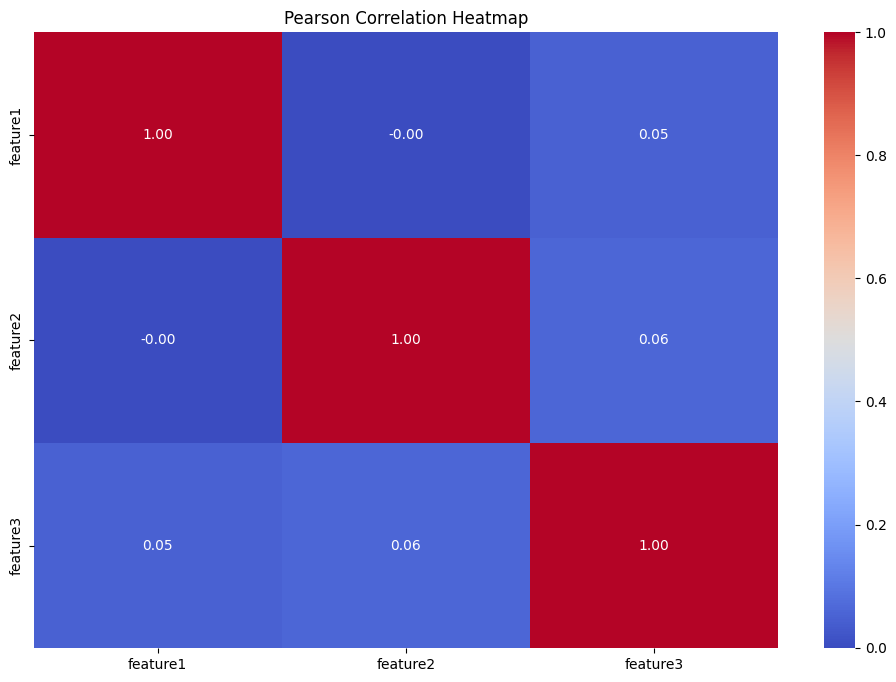

In [ ]:

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Heatmap')
plt.show()


In [ ]:

f_test = SelectKBest(score_func=f_regression, k='all')
f_test.fit(X, y)


SelectKBest(k='all', score_func=<function f_regression at 0x79ee066e6290>)

In [ ]:


f_scores = pd.DataFrame({'Feature': X.columns, 'F-Score': f_test.scores_})
f_scores = f_scores.sort_values(by='F-Score', ascending=False)
print("\nF-Regression Scores:\n", f_scores)



F-Regression Scores:
     Feature     F-Score
0  feature1  403.164147
2  feature3   99.408150
1  feature2    0.193764


In [ ]:

y_binned = pd.cut(y, bins=3, labels=[0, 1, 2])

In [ ]:
chi2_test = SelectKBest(score_func=chi2, k='all')
chi2_test.fit(X_non_negative, y_binned)


SelectKBest(k='all', score_func=<function chi2 at 0x79ee066e6050>)

In [ ]:


chi2_scores = pd.DataFrame({'Feature': X.columns, 'Chi-Square Score': chi2_test.scores_})
chi2_scores = chi2_scores.sort_values(by='Chi-Square Score', ascending=False)
print("\nChi-Square Scores:\n", chi2_scores)



Chi-Square Scores:
     Feature  Chi-Square Score
0  feature1         25.274161
2  feature3          3.588795
1  feature2          0.014106


In [ ]:

feature_selection_summary = pd.merge(f_scores, chi2_scores, on='Feature', how='inner')
print("\nFeature Selection Summary:\n", feature_selection_summary)



Feature Selection Summary:
     Feature     F-Score  Chi-Square Score
0  feature1  403.164147         25.274161
1  feature3   99.408150          3.588795
2  feature2    0.193764          0.014106
